# Housekeeping

In [1]:
import pandas as pd
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
pd.set_option('display.max_columns', None)
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [5]:
analys_data =df
analys_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

# How much data do we have?

In [6]:
len(df)            #Nr of observations

396030

In [7]:
df.isnull().sum() #missing data

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

[Text(0, 0, 'Employment title'),
 Text(1, 0, 'Employment lenght'),
 Text(2, 0, 'Utilization rate'),
 Text(3, 0, 'Mortage Accounts'),
 Text(4, 0, 'Bankruptcies')]

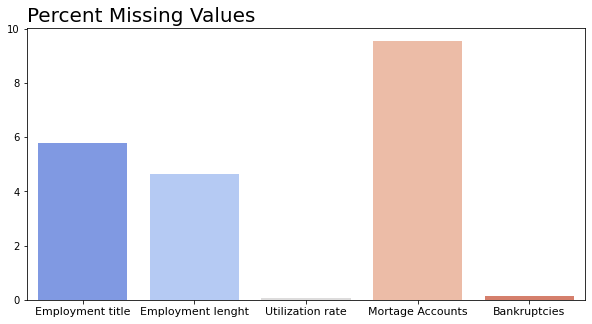

In [8]:
_plot = pd.DataFrame(100 * df.isnull().drop('title',axis=1).sum() / len(df),
                    columns = ['percent'])
_plot.reset_index(inplace=True)
_plot = _plot[_plot['percent']>0]

plt.figure(figsize=(10,5))
g= sns.barplot(x='index',y='percent', data=_plot,palette="coolwarm")
plt.title('Percent Missing Values', size=20, loc='left')
plt.xlabel('')
plt.ylabel('')
g.set_xticklabels(labels=["Employment title", "Employment lenght", "Utilization rate",
                         'Mortage Accounts',"Bankruptcies"], rotation=0,size=11)

**Employment Title**

In [9]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [10]:
df['emp_title'].nunique() #Too many categories to just make dummies from anyways => drop emp_title

173105

In [11]:
df['emp_title'].value_counts() 

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [12]:
df = df.drop('emp_title',axis=1)
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Employment lenght**

In [13]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [14]:
df['emp_length'].nunique() #11 classes

11

In [15]:
df['emp_length'].value_counts() 

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [16]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [17]:
emp_order = [
    '< 1 year',
    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

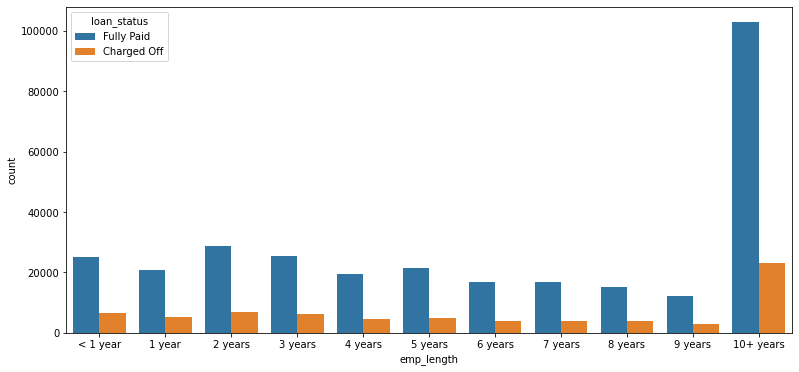

In [18]:
#Countplot
plt.figure(figsize=(13,6))  
sns.countplot(x='emp_length',data=df,order=emp_order,hue='loan_status')

Text(0.0, 1.0, 'Direct ratio')

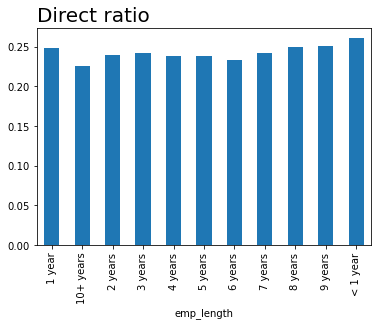

In [19]:
#Ratio plot
emp_1 =df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_0 =df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_p = emp_1 /  emp_0 #Direct ratio

emp_p.plot(kind='bar')
plt.title('Direct ratio', size=20, loc='left')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1 year'),
  Text(1, 0, '10+ years'),
  Text(2, 0, '2 years'),
  Text(3, 0, '3 years'),
  Text(4, 0, '4 years'),
  Text(5, 0, '5 years'),
  Text(6, 0, '6 years'),
  Text(7, 0, '7 years'),
  Text(8, 0, '8 years'),
  Text(9, 0, '9 years'),
  Text(10, 0, '< 1 year')])

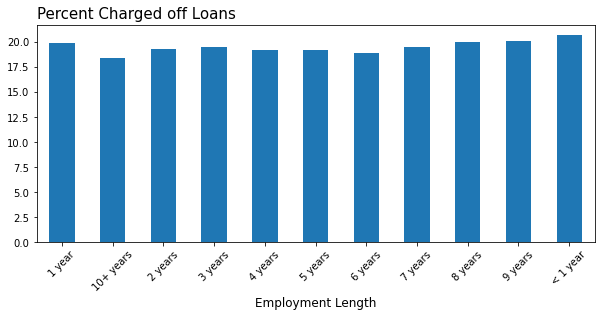

In [20]:
#percetnage plot
emp_1 =df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_0 =df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_p = (emp_1 /  (emp_0+emp_1))*100 #Direct ratio

plt.figure(figsize=(10,4))
g=emp_p.plot(kind='bar')
plt.title('Percent Charged off Loans', size=15, loc='left')
plt.xlabel('Employment Length',size=12)
plt.xticks(rotation=45)

In [21]:
df = df.drop('emp_length',axis=1) #No variation over loan status by emp lenght => ok to drop it
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Title and purpose**

In [22]:
feat_info('title')
feat_info('purpose')

The loan title provided by the borrower
A category provided by the borrower for the loan request. 


In [23]:
df['title'].nunique()

48817

In [24]:
df['purpose'].nunique()

14

In [25]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [203]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [204]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [205]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [26]:
df = df.drop('title',axis=1) #The title is just the same as purpose => drop title
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**Number of Mortage Accounts**

In [30]:
feat_info('mort_acc')

Number of mortgage accounts.


In [31]:
df['mort_acc'].nunique() #33 unique values. May be treated as a continous variable

33

In [32]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

Text(0.5, 0, 'Mortage Accounts')

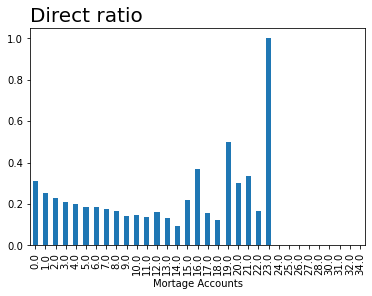

In [33]:
#Ratio plot
mort_1 =df[df['loan_status']=='Charged Off'].groupby('mort_acc').count()['loan_status']
mort_0 =df[df['loan_status']=='Fully Paid'].groupby('mort_acc').count()['loan_status']
mort_p = mort_1 /  mort_0 #Direct ratio

mort_p.plot(kind='bar')
plt.title('Direct ratio', size=20, loc='left')
plt.xlabel('Mortage Accounts')

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '30'),
 Text(30, 0, '31'),
 Text(31, 0, '32'),
 Text(32, 0, '34')]

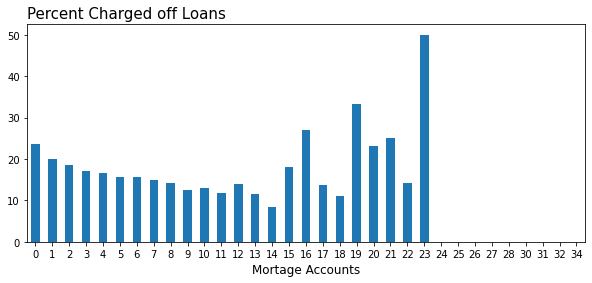

In [208]:
#percentage plot
mort_1 =df[df['loan_status']=='Charged Off'].groupby('mort_acc').count()['loan_status']
mort_0 =df[df['loan_status']=='Fully Paid'].groupby('mort_acc').count()['loan_status']
mort_p = (mort_1 /  (mort_0+mort_1))*100 #Direct ratio

plt.figure(figsize=(10,4))
g=mort_p.plot(kind='bar')
plt.title('Percent Charged off Loans', size=15, loc='left')
plt.xlabel('Mortage Accounts',size=12)
g.set_xticklabels(labels=["0", "1", "2", '3', '4', '5', '6', '7', '8', '9', '10',
                          '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                          '21', '22', '23', '24', '25', '26', '27', '28', '30',
                         '31',"32", '34'], rotation=0)

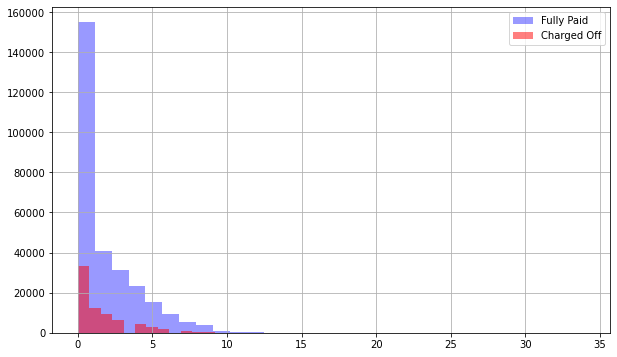

In [35]:
plt.figure(figsize=(10,6))
df[df['loan_status']=='Fully Paid']['mort_acc'].hist(alpha=0.4,color='blue', bins=30,label='Fully Paid')
df[df['loan_status']=='Charged Off']['mort_acc'].hist(alpha=0.5,color='red',  bins=30,label='Charged Off')
plt.legend()

*We might be able to do a fill  in based on linear correlation:*

[Text(0, 0, 'Interest rate'),
 Text(1, 0, 'DPI'),
 Text(2, 0, 'Utilization rate'),
 Text(3, 0, 'Derogatory records'),
 Text(4, 0, 'Bankruptcies'),
 Text(5, 0, 'Open credit lines'),
 Text(6, 0, 'Installment'),
 Text(7, 0, 'Credit balance'),
 Text(8, 0, 'Loan amount'),
 Text(9, 0, 'Annual income'),
 Text(10, 0, 'Total accounts')]

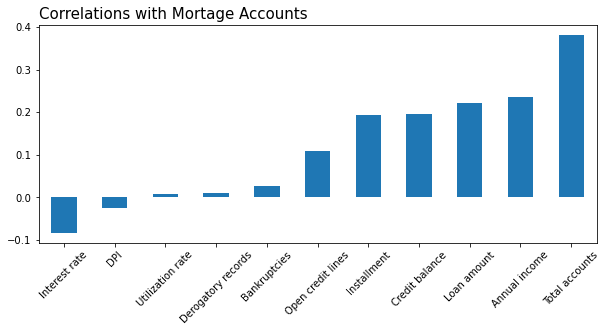

In [209]:
plt.figure(figsize=(10,4))
g = df.corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='bar')
plt.title('Correlations with Mortage Accounts', size=15, loc='left')
g.set_xticklabels(labels=["Interest rate", "DPI", 
                          "Utilization rate", 'Derogatory records', 
                          'Bankruptcies', 'Open credit lines', 'Installment',
                          'Credit balance', 'Loan amount', 'Annual income', 
                          'Total accounts'], rotation=45)

In [27]:
acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [28]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return acc_avg[total_acc]
    else:
        return mort_acc

In [29]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [40]:
df = df.dropna() #Its only less than half a percent of all the data => drop the observations
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [30]:
sample_data = df

# Categorical Variables

In [42]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'], object: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']}

In [43]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**Grade variables**

In [44]:
df['grade'].value_counts()

B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

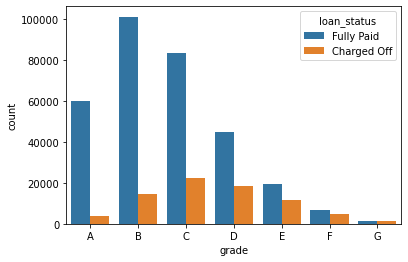

In [45]:
grade_order= sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,order=grade_order,hue='loan_status')

In [46]:
(df['sub_grade'].value_counts())

B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

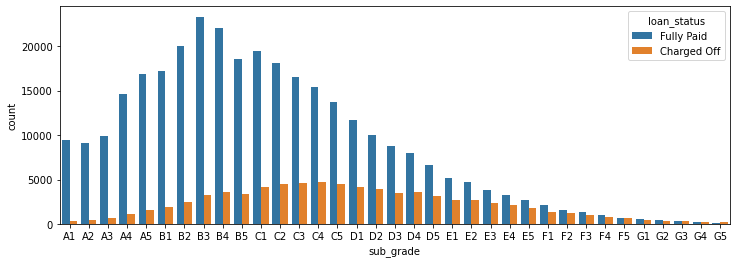

In [47]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

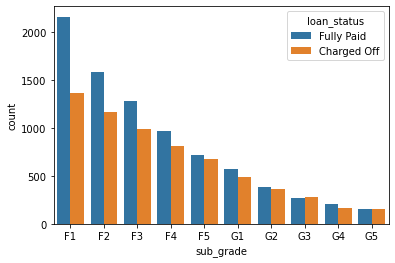

In [48]:
f_g = df[(df['grade']=='F') | (df['grade']=='G')]
subgrade_order = sorted(f_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_g,order=subgrade_order,hue='loan_status')

In [31]:
df = df.drop('grade',axis=1) #grade is just part of sub grade

In [32]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'],  drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummies], axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

**term variable**

In [51]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [52]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [33]:
df['term'] = df['term'].map({' 36 months': 36, ' 60 months': 60})
df['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

**Other categorical variabled**

In [54]:
feat_info('verification_status')
feat_info('application_type')
feat_info('initial_list_status')
feat_info('purpose')

Indicates if income was verified by LC, not verified, or if the income source was verified
Indicates whether the loan is an individual application or a joint application with two co-borrowers
The initial listing status of the loan. Possible values are – W, F
A category provided by the borrower for the loan request. 


In [55]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [56]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [57]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [58]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [34]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],


**Home Ownership**

In [60]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [35]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [36]:
home_own_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),home_own_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'],
 

**address**

In [37]:
def conv1(stri):
    return stri.split('\n')[1]
def conv2(stri2):
    return stri2[-5:]

In [38]:
df['zip_code'] = df['address'].apply(conv1).apply(conv2)
df['zip_code'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [65]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [39]:
sample_data = pd.concat([sample_data,df['zip_code']],axis=1)

In [40]:
zip_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop('address',axis=1)
df = pd.concat([df.drop('zip_code',axis=1),zip_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
    

**Issued loans**

In [68]:
feat_info('issue_d') #upon decision, we wont have a issue data => data leakage

The month which the loan was funded


In [41]:
df = df.drop('issue_d',axis=1)

**Date of earliest credit line opened**

In [70]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [71]:
df['earliest_cr_line'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object>

In [42]:
def cr_conv1(date_string):
    return date_string.split('-')[1]

In [43]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(cr_conv1)
df['earliest_cr_year'] = pd.to_numeric(df['earliest_cr_year'])
df['earliest_cr_year'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_year, dtype: int64

In [44]:
df= df.drop('earliest_cr_line',axis=1)

In [45]:
analysis_data = df

In [76]:
sorted(analysis_data.columns)

['05113',
 '11650',
 '22690',
 '29597',
 '30723',
 '48052',
 '70466',
 '86630',
 '93700',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'OTHER',
 'OWN',
 'RENT',
 'annual_inc',
 'application_type_INDIVIDUAL',
 'application_type_JOINT',
 'dti',
 'earliest_cr_year',
 'initial_list_status_w',
 'installment',
 'int_rate',
 'loan_amnt',
 'loan_status',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'revol_bal',
 'revol_util',
 'term',
 'total_acc',
 'verification_status_Source Verifi

# Descriptive stat

**Loan Status**

In [46]:
df['Fully_paid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
list1 = analysis_data[['Fully_paid', 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 
                       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                       'total_acc', 'mort_acc', 'pub_rec_bankruptcies','earliest_cr_year']]

(array([0, 1]), [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

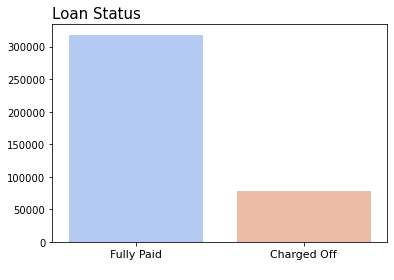

In [47]:
sns.countplot(x='loan_status', data=df,palette="coolwarm")
plt.title("Loan Status",loc='left',size=15)
plt.xlabel(' ' )
plt.ylabel('')
plt.xticks(size=11)

In [79]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77523.0,15132.578074,8503.989092,1000.0,8575.0,14000.0,20000.0,40000.0
Fully Paid,317696.0,13875.478681,8302.172723,500.0,7500.0,12000.0,19275.0,40000.0


In [80]:
#sns.pairplot(list1.drop('Fully_paid',axis=1), hue='loan_status') Tar för mycket tid att köra

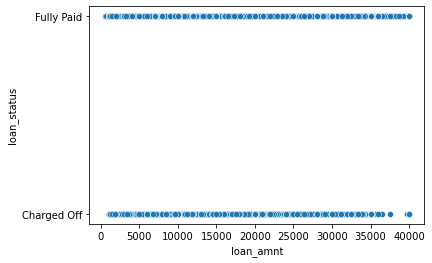

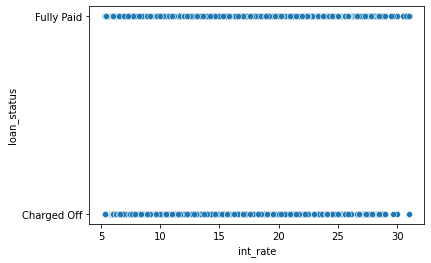

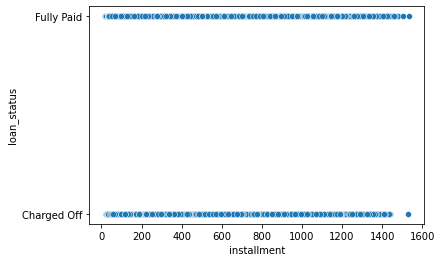

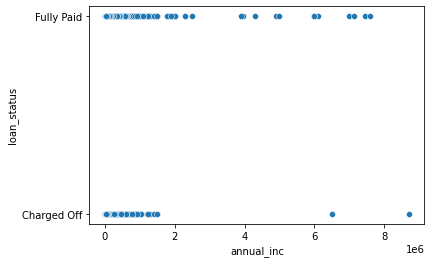

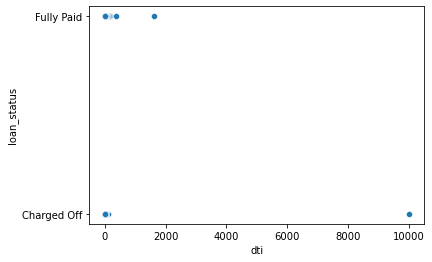

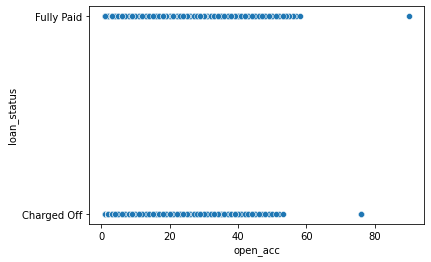

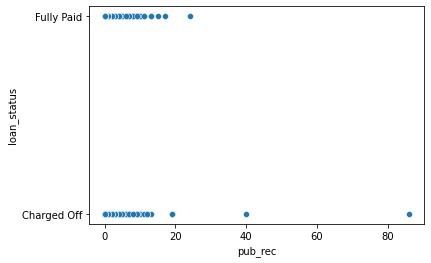

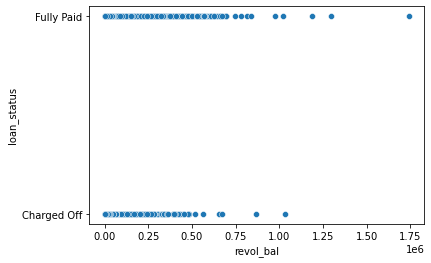

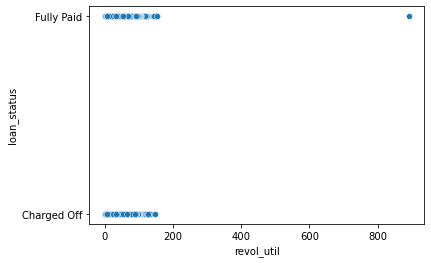

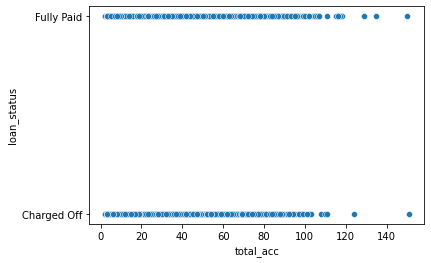

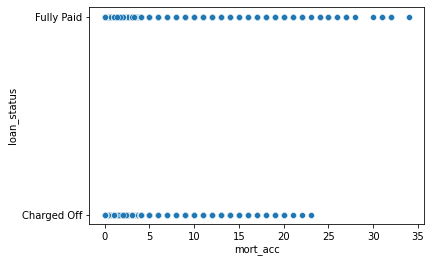

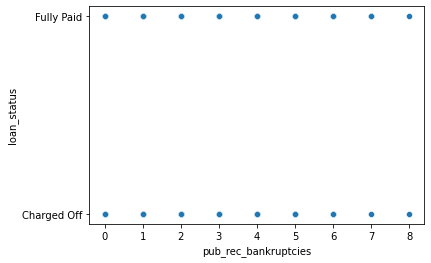

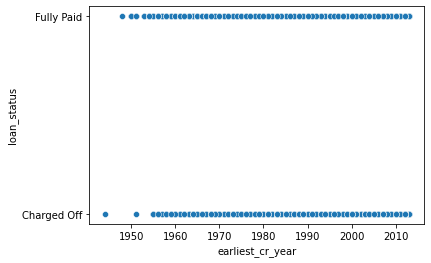

In [81]:
for COLUMN in analysis_data[['loan_amnt', 'int_rate', 'installment', 'annual_inc',
                             'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                             'total_acc', 'mort_acc', 'pub_rec_bankruptcies','earliest_cr_year']] :
    #columnSeriesObj = analysis_data[COLUMN]
    plt.figure(COLUMN)
    sns.scatterplot(x=COLUMN,y='loan_status', data=analysis_data)
    plt.savefig("scatter" + str(COLUMN) + ".png")

In [82]:
list2 = analysis_data[['Fully_paid','A2', 'A3', 'A4', 'A5','B1', 'B2', 'B3', 'B4', 'B5',
                       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2','D3', 'D4', 'D5', 'E1',
                       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4','F5', 'G1', 'G2', 'G3', 'G4', 'G5']]

In [83]:
list3 = analysis_data[['Fully_paid','term', 'verification_status_Source Verified', 'verification_status_Verified',
                       'application_type_INDIVIDUAL', 'application_type_JOINT','initial_list_status_w']]

In [84]:
list4 = analysis_data[['Fully_paid','purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational',
                       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical',
                       'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
                       'purpose_vacation', 'purpose_wedding']]

In [85]:
list5 = analysis_data[['Fully_paid', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', 
                       '48052', '70466', '86630', '93700']]

In [86]:
list1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fully_paid,395219.0,0.803848,0.397085,0.00,1.00,1.00,1.00,1.00
loan_amnt,395219.0,14122.061250,8357.054944,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,395219.0,13.642094,4.472944,5.32,10.49,13.33,16.55,30.99
installment,395219.0,432.069020,250.700153,16.08,250.33,375.49,567.79,1533.81
annual_inc,395219.0,74199.372426,61557.251371,0.00,45000.00,64000.00,90000.00,8706582.00
dti,395219.0,17.390758,18.032696,0.00,11.30,16.92,22.99,9999.00
open_acc,395219.0,11.318494,5.134901,1.00,8.00,10.00,14.00,90.00
pub_rec,395219.0,0.178481,0.531098,0.00,0.00,0.00,0.00,86.00
revol_bal,395219.0,15851.653309,20584.268053,0.00,6038.00,11190.00,19626.00,1743266.00
revol_util,395219.0,53.808764,24.440088,0.00,35.90,54.80,72.90,892.30


In [87]:
#list2.drop('Fully_paid',axis=1).describe().transpose()

In [88]:
list3.drop('Fully_paid',axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
term,395219.0,41.706527,10.217263,36.0,36.0,36.0,36.0,60.0
verification_status_Source Verified,395219.0,0.332223,0.471011,0.0,0.0,0.0,1.0,1.0
verification_status_Verified,395219.0,0.352845,0.477856,0.0,0.0,0.0,1.0,1.0
application_type_INDIVIDUAL,395219.0,0.998201,0.042377,0.0,1.0,1.0,1.0,1.0
application_type_JOINT,395219.0,0.001075,0.032775,0.0,0.0,0.0,0.0,1.0
initial_list_status_w,395219.0,0.399457,0.489787,0.0,0.0,0.0,1.0,1.0


In [89]:
list4.drop('Fully_paid',axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
purpose_credit_card,395219.0,0.209815,0.407177,0.0,0.0,0.0,0.0,1.0
purpose_debt_consolidation,395219.0,0.592504,0.491369,0.0,0.0,1.0,1.0,1.0
purpose_educational,395219.0,0.000622,0.024941,0.0,0.0,0.0,0.0,1.0
purpose_home_improvement,395219.0,0.060627,0.238645,0.0,0.0,0.0,0.0,1.0
purpose_house,395219.0,0.005559,0.074351,0.0,0.0,0.0,0.0,1.0
purpose_major_purchase,395219.0,0.022155,0.147187,0.0,0.0,0.0,0.0,1.0
purpose_medical,395219.0,0.010564,0.102236,0.0,0.0,0.0,0.0,1.0
purpose_moving,395219.0,0.007191,0.084494,0.0,0.0,0.0,0.0,1.0
purpose_other,395219.0,0.053284,0.224600,0.0,0.0,0.0,0.0,1.0
purpose_renewable_energy,395219.0,0.000832,0.028840,0.0,0.0,0.0,0.0,1.0


In [90]:
list5.drop('Fully_paid',axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OTHER,395219.0,0.000359,0.018952,0.0,0.0,0.0,0.0,1.0
OWN,395219.0,0.095289,0.293614,0.0,0.0,0.0,0.0,1.0
RENT,395219.0,0.403308,0.490562,0.0,0.0,0.0,1.0,1.0
05113,395219.0,0.114620,0.318563,0.0,0.0,0.0,0.0,1.0
11650,395219.0,0.028364,0.166011,0.0,0.0,0.0,0.0,1.0
22690,395219.0,0.142739,0.349807,0.0,0.0,0.0,0.0,1.0
29597,395219.0,0.114855,0.318848,0.0,0.0,0.0,0.0,1.0
30723,395219.0,0.142711,0.349778,0.0,0.0,0.0,0.0,1.0
48052,395219.0,0.141215,0.348244,0.0,0.0,0.0,0.0,1.0
70466,395219.0,0.143920,0.351009,0.0,0.0,0.0,0.0,1.0


**Correlations**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'Fully_paid'),
  Text(1.5, 0, 'loan_amnt'),
  Text(2.5, 0, 'int_rate'),
  Text(3.5, 0, 'installment'),
  Text(4.5, 0, 'annual_inc'),
  Text(5.5, 0, 'dti'),
  Text(6.5, 0, 'open_acc'),
  Text(7.5, 0, 'pub_rec'),
  Text(8.5, 0, 'revol_bal'),
  Text(9.5, 0, 'revol_util'),
  Text(10.5, 0, 'total_acc'),
  Text(11.5, 0, 'mort_acc'),
  Text(12.5, 0, 'pub_rec_bankruptcies'),
  Text(13.5, 0, 'earliest_cr_year')])

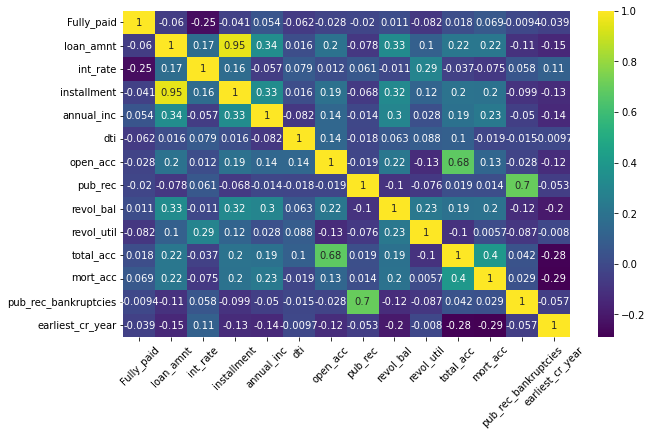

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(list1.corr(),annot=True, cmap='viridis')
plt.xticks(rotation=45)

*loan_amnt and installment very correlated. Perfect predoctor of loan_status?*

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

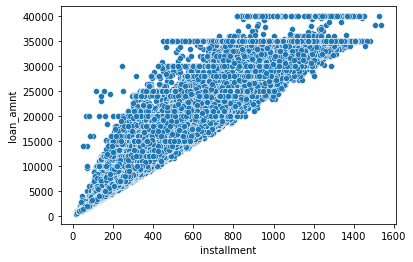

In [92]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

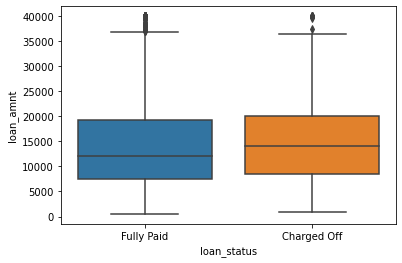

In [93]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [94]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77523.0,15132.578074,8503.989092,1000.0,8575.0,14000.0,20000.0,40000.0
Fully Paid,317696.0,13875.478681,8302.172723,500.0,7500.0,12000.0,19275.0,40000.0


*Should be fine :)*

Text(0.0, 1.0, 'Correlations with Loan Status')

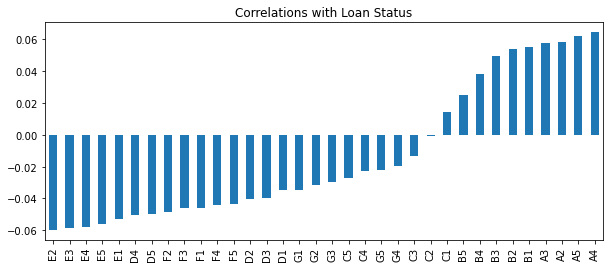

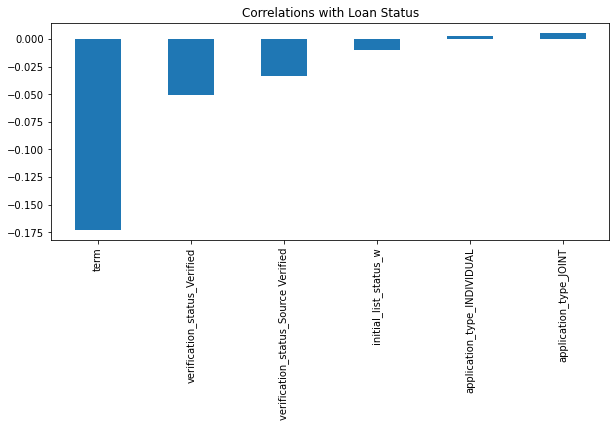

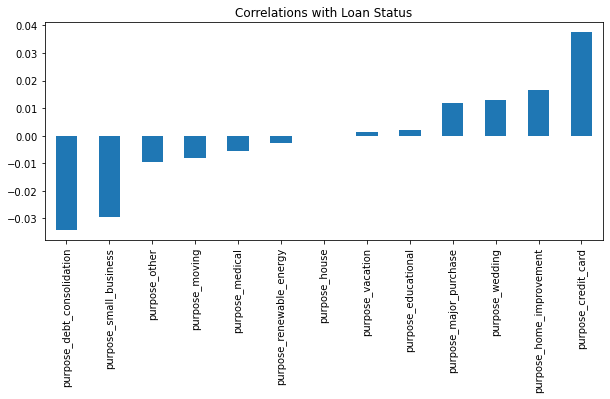

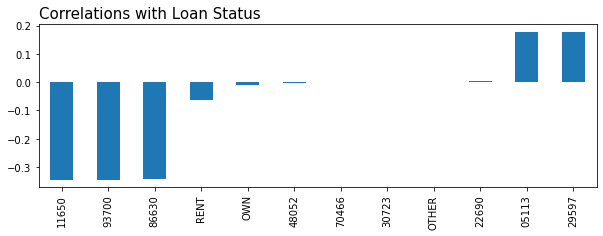

In [95]:
plt.figure(figsize=(10,4))
list2.corr('spearman')['Fully_paid'].sort_values().drop('Fully_paid').plot(kind='bar')
plt.title('Correlations with Loan Status')

plt.figure(figsize=(10,4))
list3.corr('spearman')['Fully_paid'].sort_values().drop('Fully_paid').plot(kind='bar')
plt.title('Correlations with Loan Status')

plt.figure(figsize=(10,4))
list4.corr('spearman')['Fully_paid'].sort_values().drop('Fully_paid').plot(kind='bar')
plt.title('Correlations with Loan Status')

plt.figure(figsize=(10,3))
list5.corr('spearman')['Fully_paid'].sort_values().drop('Fully_paid').plot(kind='bar')
plt.title('Correlations with Loan Status',loc='left',size=15)

**Distributions, continous variables**

In [96]:
list1.columns

Index(['Fully_paid', 'loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'earliest_cr_year'],
      dtype='object')

<Figure size 720x288 with 0 Axes>

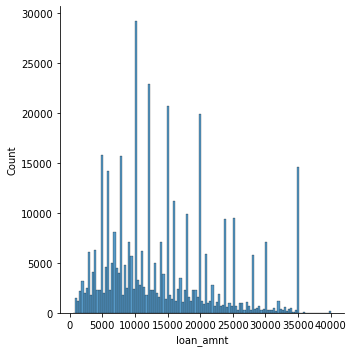

In [97]:
plt.figure(figsize=(10,4))
sns.displot(analysis_data['loan_amnt'],kde=False)

In [ ]:
loan_status => Loan status

Text(0, 0.5, 'Interest Rate')

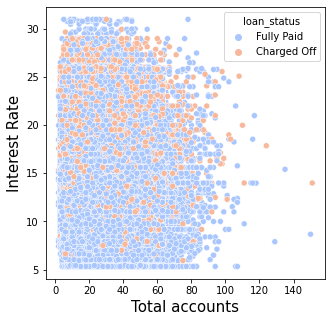

In [63]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='total_acc',y='int_rate',hue='loan_status',data=analysis_data, palette="coolwarm")
plt.xlabel('Total accounts',size=15)
plt.ylabel('Interest Rate',size=15)

Text(25.473541666666662, 0.5, '')

<Figure size 360x360 with 0 Axes>

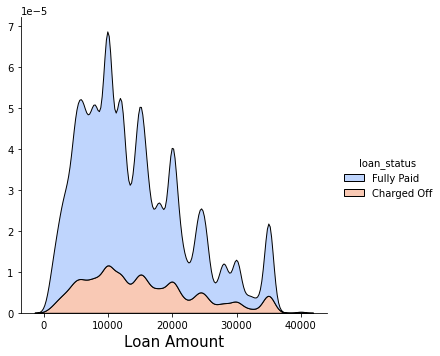

In [64]:
plt.figure(figsize=(5,5))
sns.displot(analysis_data, x='loan_amnt', hue='loan_status', kind='kde',multiple="stack",palette="coolwarm")
plt.xlabel('Loan Amount',size=15)
plt.ylabel('')

Text(9.473541666666662, 0.5, '')

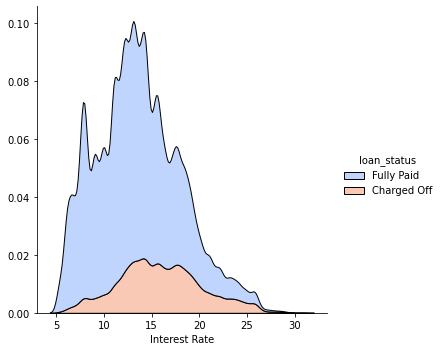

In [100]:
sns.displot(analysis_data, x='int_rate', hue='loan_status', kind='kde',multiple="stack",palette="coolwarm")
plt.xlabel('Interest Rate')
plt.ylabel('')

<AxesSubplot:xlabel='installment', ylabel='annual_inc'>

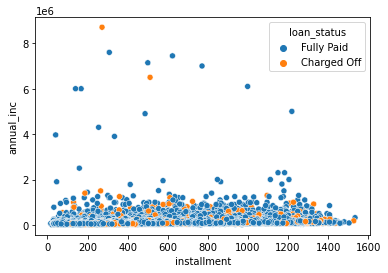

In [101]:
sns.scatterplot(x='installment',y='annual_inc',hue='loan_status',data=analysis_data)

Text(-3.2764583333333377, 0.5, '')

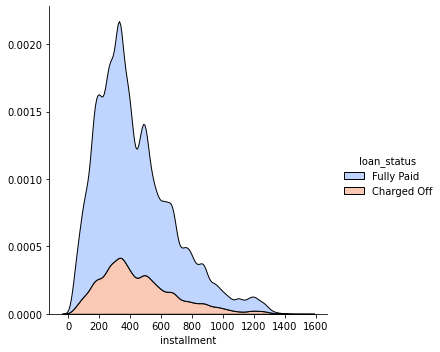

In [102]:
sns.displot(analysis_data, x='installment', hue='loan_status', kind='kde',multiple="stack",palette="coolwarm")
plt.xlabel('installment')
plt.ylabel('')

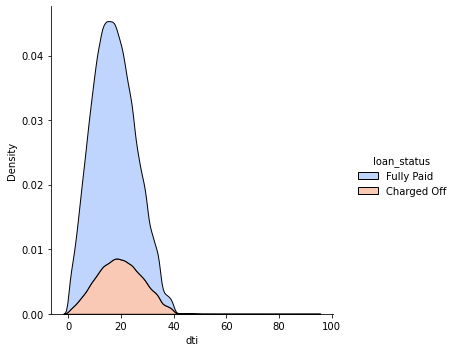

In [103]:
sns.displot(analysis_data[analysis_data['dti']<100], x='dti', hue='loan_status',
            kind='kde',multiple="stack",palette="coolwarm")
#Some serious outliers there...

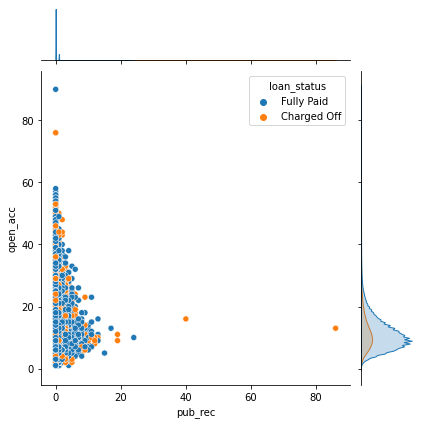

In [104]:
sns.jointplot(x='pub_rec',y='open_acc',hue='loan_status',data=analysis_data)

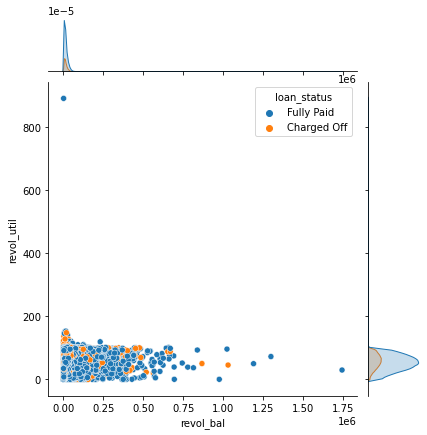

In [105]:
sns.jointplot(x='revol_bal',y='revol_util',hue='loan_status',data=analysis_data)
#revol_util got some real outlier there...

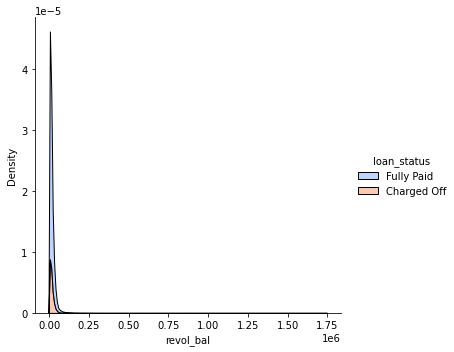

In [106]:
sns.displot(analysis_data, x='revol_bal', hue='loan_status',
            kind='kde',multiple="stack",palette="coolwarm")

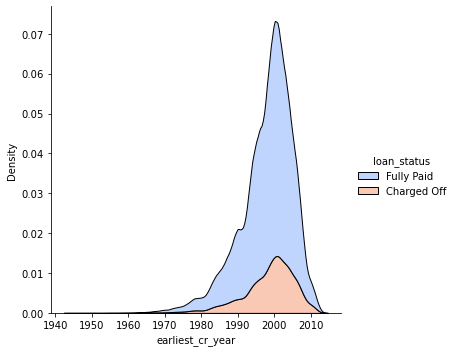

In [107]:

sns.displot(analysis_data, x='earliest_cr_year', hue='loan_status',
            kind='kde',multiple="stack",palette="coolwarm")

<AxesSubplot:xlabel='total_acc', ylabel='mort_acc'>

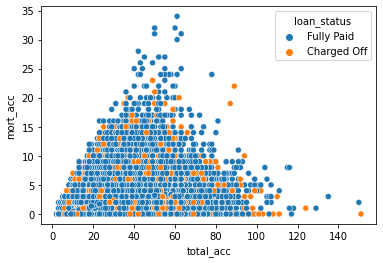

In [108]:
sns.scatterplot(x='total_acc',y='mort_acc',hue='loan_status',data=analysis_data)

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

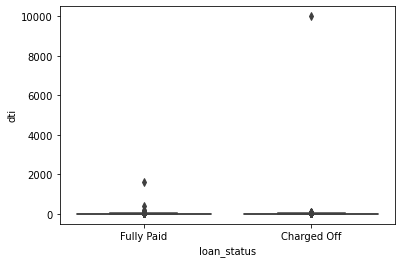

In [109]:
sns.boxplot(x='loan_status', y='dti', data=analysis_data)

<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

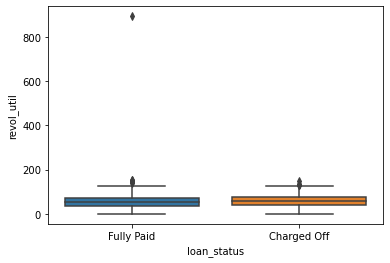

In [110]:
sns.boxplot(x='loan_status', y='revol_util', data=analysis_data)

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec'>

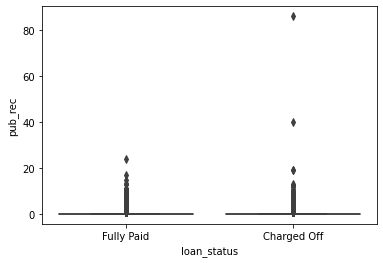

In [111]:
sns.boxplot(x='loan_status', y='pub_rec', data=analysis_data)

**Distributions categorical variables**

In [112]:
analysis_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [113]:
sample_data.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address', 'zip_code'],
      dtype='object')

In [114]:
#Data: sample_data

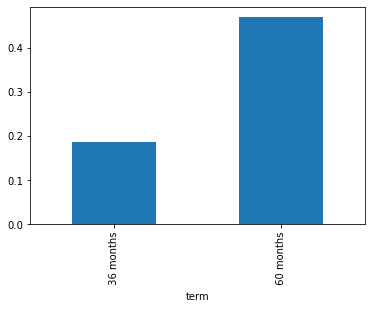

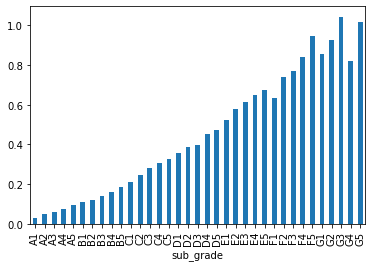

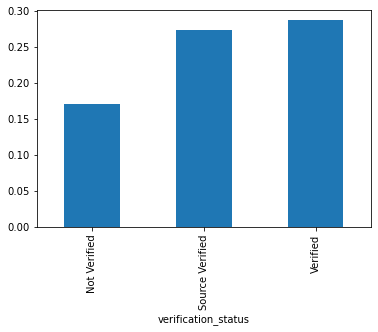

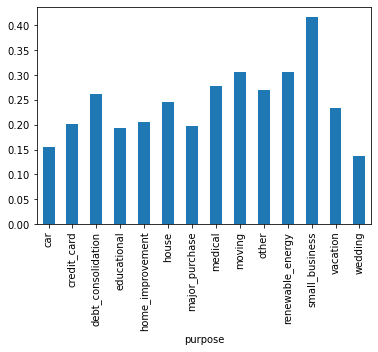

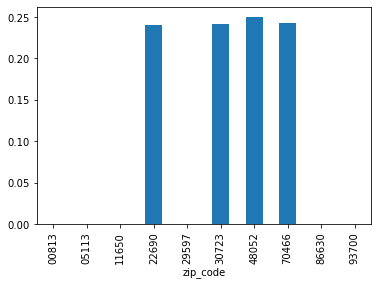

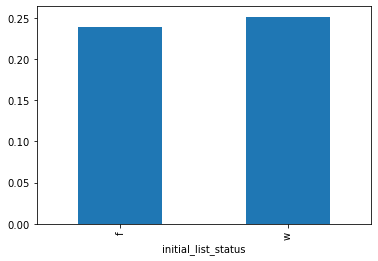

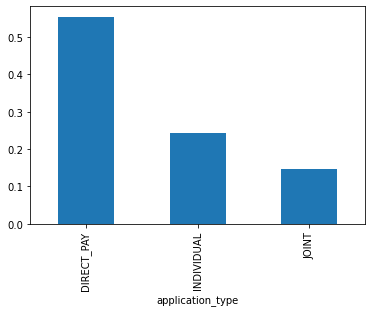

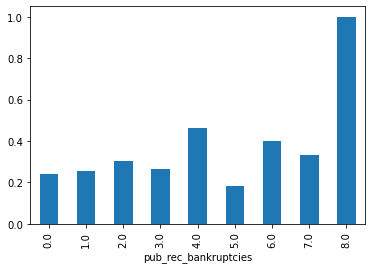

In [115]:
#Ratio plots
for COLUMN in sample_data[['term', 'sub_grade', 'verification_status', 'purpose', 'zip_code', 
                           'initial_list_status', 'application_type','pub_rec_bankruptcies']] :
    #columnSeriesObj = sample_data[COLUMN]
    plt.figure(COLUMN)
    sub_1 =sample_data[sample_data['loan_status']=='Charged Off'].groupby(COLUMN).count()['loan_status']
    sub_0 =sample_data[sample_data['loan_status']=='Fully Paid'].groupby(COLUMN).count()['loan_status']
    sub_p = sub_1 /  sub_0 #Direct ratio
    sub_p.plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'A1'),
  Text(1, 0, 'A2'),
  Text(2, 0, 'A3'),
  Text(3, 0, 'A4'),
  Text(4, 0, 'A5'),
  Text(5, 0, 'B1'),
  Text(6, 0, 'B2'),
  Text(7, 0, 'B3'),
  Text(8, 0, 'B4'),
  Text(9, 0, 'B5'),
  Text(10, 0, 'C1'),
  Text(11, 0, 'C2'),
  Text(12, 0, 'C3'),
  Text(13, 0, 'C4'),
  Text(14, 0, 'C5'),
  Text(15, 0, 'D1'),
  Text(16, 0, 'D2'),
  Text(17, 0, 'D3'),
  Text(18, 0, 'D4'),
  Text(19, 0, 'D5'),
  Text(20, 0, 'E1'),
  Text(21, 0, 'E2'),
  Text(22, 0, 'E3'),
  Text(23, 0, 'E4'),
  Text(24, 0, 'E5'),
  Text(25, 0, 'F1'),
  Text(26, 0, 'F2'),
  Text(27, 0, 'F3'),
  Text(28, 0, 'F4'),
  Text(29, 0, 'F5'),
  Text(30, 0, 'G1'),
  Text(31, 0, 'G2'),
  Text(32, 0, 'G3'),
  Text(33, 0, 'G4'),
  Text(34, 0, 'G5')])

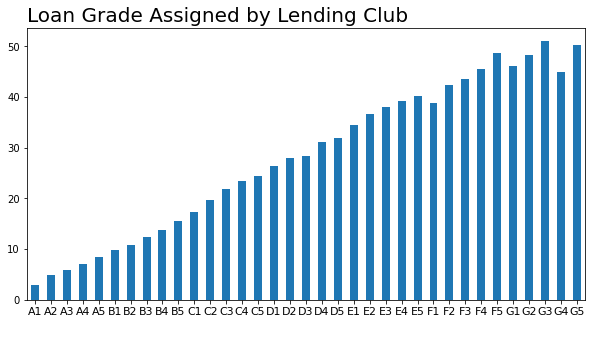

In [62]:
#Percentage plots    
sub_1 =sample_data[sample_data['loan_status']=='Charged Off'].groupby('sub_grade').count()['loan_status']
sub_0 =sample_data[sample_data['loan_status']=='Fully Paid'].groupby('sub_grade').count()['loan_status']
sub_p = (sub_1 /  (sub_0+sub_1))*100 
 
plt.figure(figsize=(10,5))
sub_p.plot(kind='bar')
plt.title('Loan Grade Assigned by Lending Club',size=20,loc='left')
plt.xlabel(' ',size=15)
plt.xticks(rotation=0,size=11)

[Text(0, 0, 'Car'),
 Text(1, 0, 'Credit card'),
 Text(2, 0, 'Debt'),
 Text(3, 0, 'Education'),
 Text(4, 0, 'Renovation'),
 Text(5, 0, 'House'),
 Text(6, 0, 'Major purchase'),
 Text(7, 0, 'Medical'),
 Text(8, 0, 'Moving'),
 Text(9, 0, 'Other'),
 Text(10, 0, 'Renewable energy'),
 Text(11, 0, 'Small busienss'),
 Text(12, 0, 'Vacation'),
 Text(13, 0, 'Wedding')]

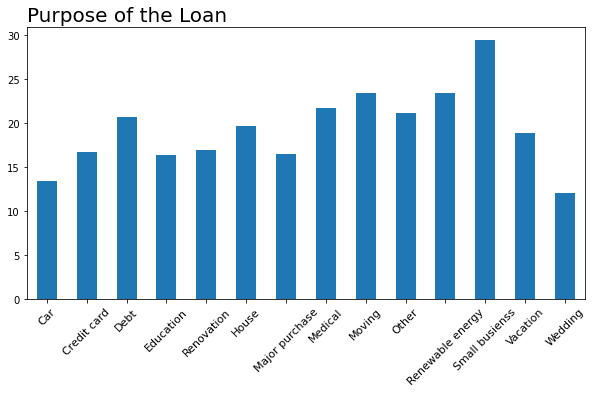

In [61]:
#Percentage plots    
sub_1 =sample_data[sample_data['loan_status']=='Charged Off'].groupby('purpose').count()['loan_status']
sub_0 =sample_data[sample_data['loan_status']=='Fully Paid'].groupby('purpose').count()['loan_status']
sub_p = (sub_1 /  (sub_0+sub_1))*100 
    
plt.figure(figsize=(10,5))
g=sub_p.plot(kind='bar')
plt.title('Purpose of the Loan',size=20,loc='left')
plt.xlabel(' ',size=15)
g.set_xticklabels(labels=["Car", "Credit card", "Debt", "Education", "Renovation",
                          "House","Major purchase","Medical","Moving","Other",
                          "Renewable energy","Small busienss", "Vacation","Wedding"], rotation=45,size=11)

[Text(0, 0, 'Direct pay'), Text(1, 0, 'Individual'), Text(2, 0, 'Joint')]

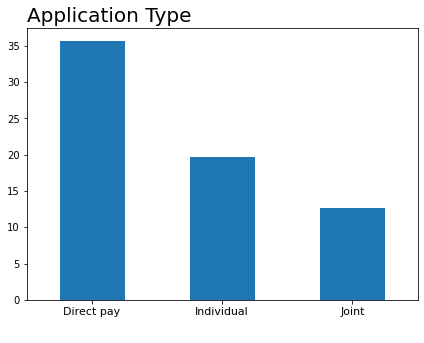

In [60]:
sub_1 =sample_data[sample_data['loan_status']=='Charged Off'].groupby('application_type').count()['loan_status']
sub_0 =sample_data[sample_data['loan_status']=='Fully Paid'].groupby('application_type').count()['loan_status']
sub_p = (sub_1 /  (sub_0+sub_1))*100 
    
plt.figure(figsize=(7,5))
g = sub_p.plot(kind='bar')
plt.title('Application Type',size=20,loc='left')
plt.xlabel(' ',size=15)
g.set_xticklabels(labels=["Direct pay", "Individual", "Joint"], rotation=0,size=11)

In [119]:
sample_data.groupby('loan_status')['zip_code'].value_counts()

loan_status  zip_code
Charged Off  11650       11210
             48052       11170
             70466       11128
             93700       11126
             30723       10998
             86630       10959
             22690       10932
Fully Paid   70466       45752
             00813       45725
             22690       45481
             30723       45404
             29597       45393
             05113       45300
             48052       44641
Name: zip_code, dtype: int64

<AxesSubplot:xlabel='home_ownership'>

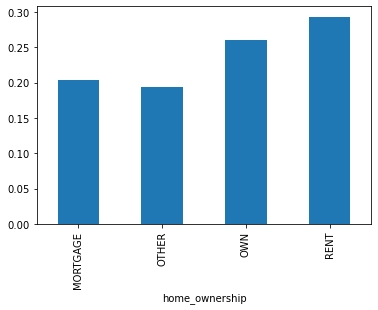

In [120]:
#Ratio plot
sample_data['home_ownership'] = sample_data['home_ownership'].replace(['NONE','ANY'], 'OTHER')

HO_1 =sample_data[sample_data['loan_status']=='Charged Off'].groupby('home_ownership').count()['loan_status']
HO_0 =sample_data[sample_data['loan_status']=='Fully Paid'].groupby('home_ownership').count()['loan_status']
HO_p = HO_1 /  HO_0 #Direct ratio

HO_p.plot(kind='bar')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MORTGAGE'),
  Text(1, 0, 'OTHER'),
  Text(2, 0, 'OWN'),
  Text(3, 0, 'RENT')])

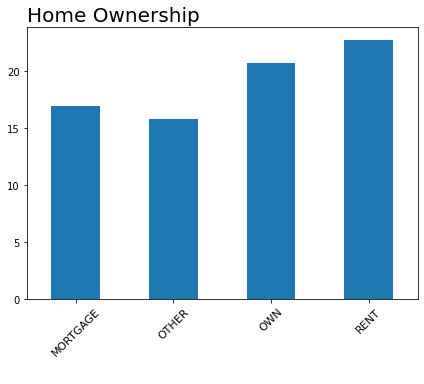

In [59]:
sample_data['home_ownership'] = sample_data['home_ownership'].replace(['NONE','ANY'], 'OTHER')

HO_1 =sample_data[sample_data['loan_status']=='Charged Off'].groupby('home_ownership').count()['loan_status']
HO_0 =sample_data[sample_data['loan_status']=='Fully Paid'].groupby('home_ownership').count()['loan_status']
HO_p = (HO_1 /  (HO_0+HO_1))*100  #Direct ratio

plt.figure(figsize=(7,5))
HO_p.plot(kind='bar')
plt.title('Home Ownership',loc='left',size=20)
plt.xlabel(' ',size=15)
plt.xticks(rotation=45,size=11)

In [ ]:
STOP

In [ ]:
#analysis_data.to_csv('../DATA/analysis_data.csv')

# Test train split

In [ ]:
analysis_data = pd.read_csv('../DATA/analysis_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
analysis_data.columns

In [ ]:
# TO DRAW A SAMPLE FROM A DATAFRAME:
# df = df.sample(frac=0.1,random_state=101)
# print(len(df))

In [ ]:
X       =analysis_data.drop(['Fully_paid','loan_status'],axis=1).values
X_small =analysis_data.drop(['A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
                                   'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
                                   'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 
                                   'G2', 'G3', 'G4', 'G5','Fully_paid','loan_status'],axis=1).values
y =analysis_data['Fully_paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y, test_size=0.20, random_state=101)

In [ ]:
len(X)

# Normalize the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) #We do not fit on test data

In [ ]:
X_train_small = scaler.fit_transform(X_train_small)
X_test_small  = scaler.transform(X_test_small)

In [ ]:
#loan status is just a dummy => no need for scaling.

In [ ]:
#X_train_df = pd.DataFrame(X_train,columns=X.columns)
#X_train_df.head()

In [ ]:
#sns.boxplot(y='dti', data=X_train)

In [ ]:
#sns.boxplot( y='revol_util', data=X_train_df)

In [ ]:
#sns.boxplot( y='pub_rec', data=X_train_df)

# Import classification metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#big_pred_RF   = RandomForestClassifier(n_estimators=600).fit(X_train,y_train).predict(X_test)
#small_pred_RF = RandomForestClassifier(n_estimators=600).fit(X_train_small,y_train_small).predict(X_test_small)

In [ ]:
Big_RF = RandomForestClassifier(n_estimators=600)
big_model_RF = Big_RF.fit(X_train,y_train)

In [ ]:
big_pred_RF = big_model_RF.predict(X_test)

In [ ]:
print('Big Model Evaluation')
print(classification_report(y_test,big_pred_RF))
print('\n')
print(confusion_matrix(y_test,big_pred_RF))

In [ ]:
#print('Small Model Evaluation')
#print(classification_report(y_test_small,small_pred_RF))
#print('\n')
#print(confusion_matrix(y_test_small,small_pred_RF))

In [ ]:
def gen1(var):
    if var ==1:
        return 1

def gen0(var):
    if var ==0:
        return 1
    
def correct(var):
    if var==0:
        return 1

def wrong(var):
    if var!=0:
        return 1


In [ ]:
pred_df = pd.DataFrame(big_pred_RF,columns=['Predicted value'])
true_df = pd.DataFrame(y_test,columns=['True value'])

RF_pred_df = pd.concat([pred_df,true_df],axis=1)

RF_pred_df['True1'] = RF_pred_df['True value'].apply(gen1)
RF_pred_df['True0'] = RF_pred_df['True value'].apply(gen0)
RF_pred_df['diff'] =  RF_pred_df['True value'] - RF_pred_df['Predicted value']
RF_pred_df['Correct']=RF_pred_df['diff'].apply(correct)
RF_pred_df['Wrong']=RF_pred_df['diff'].apply(wrong)

RF_pred_df['Prediction'] = RF_pred_df['Predicted value'].map({1:'Fully Paid', 0:'Charged Off'})
RF_pred_df['Truth'] = RF_pred_df['True value'].map({1:'Fully Paid', 0:'Charged Off'})

RF_pred_df.head()

In [ ]:
conf_df_RF = pd.crosstab(RF_pred_df['Predicted value'],RF_pred_df['True value'])
conf_df_RF

In [ ]:
conf_df_RF = RF_pred_df.groupby('Prediction').count()
conf_df_RF

In [ ]:
conf_df_RF = RF_pred_df.groupby('Prediction').count()

conf_df_RF.drop(['diff','True value','True1','True0','Predicted value','Truth'],axis=1,inplace=True)

In [ ]:
conf_df_RF

In [ ]:
conf_df_RF.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xticks(rotation=0)

In [ ]:
STOP

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]} 

In [ ]:
SV_grid  = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [ ]:
#Fungerar inte med så mkt data.
#SV_fit=SV_grid.fit(X_train,y_train)

In [ ]:
#big_pred_sv = SV_fit.predict(X_test)

In [ ]:
#SV_fit_small = SV_grid.fit(X_train_small,y_train_small)

In [ ]:
#small_pred_sv = SV_fit_small.predict(X_test_small)

In [ ]:
#print('Big Model Evaluation')
#print(classification_report(y_test,big_pred_sv))
#print('\n')
#print(confusion_matrix(y_test,big_pred_sv))

In [ ]:
#print('Small Model Evaluation')
#print(classification_report(y_test_small,small_pred_sv))
#print('\n')
#print(confusion_matrix(y_test_small,small_pred_sv))

# Neural Network Model

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
pwd #to see path

In [ ]:
log_directory = 'logs\\fit'

board1 = TensorBoard(log_dir=log_directory,
                     histogram_freq=1,
                     write_graph=True,
                     write_images=True,
                     update_freq='epoc',
                     profile_batch=2,
                     embeddings_freq=1)

**MODEL 1**

In [ ]:
model1 = Sequential()

model1.add(Dense(78,activation='relu')) 
model1.add(Dropout(rate=0.3)) #to avoid overfitting

model1.add(Dense(39,activation='relu')) 
model1.add(Dropout(rate=0.3))

model1.add(Dense(19,activation='relu'))
model1.add(Dropout(rate=0.2))

model1.add(Dense(10,activation='relu')) 
model1.add(Dropout(rate=0.2))

model1.add(Dense(5,activation='relu')) 
model1.add(Dropout(rate=0.1))

model1.add(Dense(2,activation='relu')) 
model1.add(Dropout(rate=0.1))

model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [ ]:
model1.fit(x=X_train,
           y=y_train,
           epochs=600,
           validation_data=(X_test,y_test),
           batch_size=256,
          callbacks=[early_stop,board1])

In [ ]:
model1_loss = pd.DataFrame(model1.history.history)
model1_loss.plot()

In [ ]:
print(model1.evaluate(X_train,y_train,verbose=0)) #Returns the loss on the train set
print(model1.evaluate(X_test,y_test,verbose=0))

In [ ]:
model1_predictions = (model1.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test,model1_predictions))
print('\n')
print(confusion_matrix(y_test,model1_predictions))

In [ ]:
model1.save('my_model1.h5')

**MODEL 2**

In [ ]:
model2 = Sequential()

model2.add(Dense(78,activation='relu'))
model2.add(Dropout(rate=0.2))   #to avoid overfitting

model2.add(Dense(39,activation='relu'))
model2.add(Dropout(rate=0.2))

model2.add(Dense(19,activation='relu'))
model2.add(Dropout(rate=0.2))

model2.add(Dense(9,activation='relu'))
model2.add(Dropout(rate=0.2))

model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model2.fit(x=X_train,
           y=y_train,
           epochs=600,
           validation_data=(X_test,y_test),
           batch_size=256,
          callbacks=[early_stop])

In [ ]:
model2.save('my_model.h5')

In [ ]:
model2_loss = pd.DataFrame(model2.history.history)
model2_loss.plot()

In [ ]:
model2_predictions = (model2.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test,model2_predictions))
print('\n')
print(confusion_matrix(y_test,model2_predictions))

In [ ]:
pred_df = pd.DataFrame(model2_predictions,columns=['Predicted value'])
true_df = pd.DataFrame(y_test,columns=['True value'])

NN_pred_df = pd.concat([pred_df,true_df],axis=1)

NN_pred_df['True1'] = NN_pred_df['True value'].apply(gen1)
NN_pred_df['True0'] = NN_pred_df['True value'].apply(gen0)
NN_pred_df['diff'] =  NN_pred_df['True value'] - NN_pred_df['Predicted value']
NN_pred_df['Correct']=NN_pred_df['diff'].apply(correct)
NN_pred_df['Wrong']=  NN_pred_df['diff'].apply(wrong)

NN_pred_df['Prediction'] = NN_pred_df['Predicted value'].map({1:'Fully Paid', 0:'Charged Off'})
NN_pred_df['Truth'] = NN_pred_df['True value'].map({1:'Fully Paid', 0:'Charged Off'})

conf_df_NN = pd.crosstab(NN_pred_df['Predicted value'],NN_pred_df['True value'])

conf_df_NN = NN_pred_df.groupby('Prediction').count()

conf_df_NN.drop(['diff','True value','True1','True0','Predicted value','Truth'],axis=1,inplace=True)

conf_df_NN.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xticks(rotation=0)

**MODEL F**

In [ ]:
modelF = Sequential()

modelF.add(Dense(78,  activation='relu'))
modelF.add(Dropout(0.2))

modelF.add(Dense(39, activation='relu'))
modelF.add(Dropout(0.2))

modelF.add(Dense(19, activation='relu'))
modelF.add(Dropout(0.2))

modelF.add(Dense(units=1,activation='sigmoid'))

modelF.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
modelF.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          batch_size=256,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
          )

In [ ]:
losses = pd.DataFrame(modelF.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
modelF_predictions = (modelF.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test,modelF_predictions))
print('\n')
print(confusion_matrix(y_test,modelF_predictions))

**Grabbing a random customer**

In [ ]:
import random
random-seed(101)
random_ind = random_randint(0,len(df))
new_customer = df.drop('Fully paid',axis=1).iloc[random_ind]

In [ ]:
#Reshaoe
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [ ]:
model1_predictions = (model1.predict(new_customer) > 0.5).astype("int32")